#### 군집화
##### KMeans

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
irisdf = pd.DataFrame(data=iris.data, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
# KMeans 수행
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(irisdf)

KMeans(n_clusters=3, random_state=0)

In [3]:
# 결과 표시
print(kmeans.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [4]:
# 실제와 비교
irisdf['cluster'] = kmeans.labels_
irisdf['target'] = iris.target
iris_result = irisdf.groupby(['target', 'cluster'])['sepal_length'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal_length, dtype: int64

In [6]:
# 성능평가
kmeans.inertia_

78.85144142614601

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris.data)

irisdf['pca_x'] = pca_transformed[:,0]
irisdf['pca_y'] = pca_transformed[:,1]
irisdf.head()

,sepal_length,sepal_width,petal_length,petal_width,cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


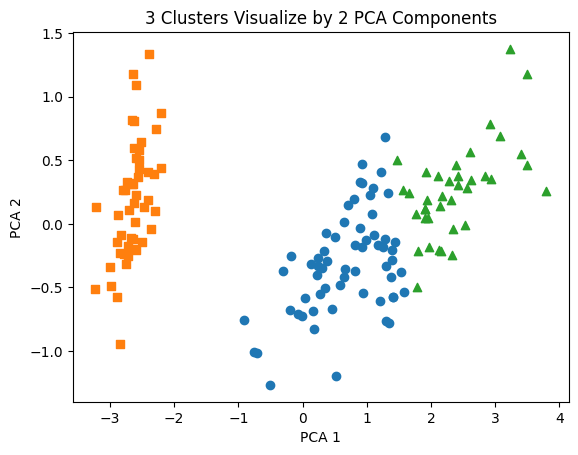

In [9]:
# 군집값이 0,1,2인 경우마다 별도의 인덱스로 추출
marker0_ind = irisdf[irisdf['cluster'] == 0].index
marker1_ind = irisdf[irisdf['cluster'] == 1].index
marker2_ind = irisdf[irisdf['cluster'] == 2].index

# 군집 값 0, 1, 2에 해당하는 인덱스로 각 군집 레벨의 pca_x, pca_y값 추출, o,s,^ 로 마커 표시
plt.scatter(x=irisdf.loc[marker0_ind, 'pca_x'], y=irisdf.loc[marker0_ind, 'pca_y'], marker='o')
plt.scatter(x=irisdf.loc[marker1_ind, 'pca_x'], y =irisdf.loc[marker1_ind, 'pca_y'], marker='s')
plt.scatter(x=irisdf.loc[marker2_ind, 'pca_x'], y=irisdf.loc[marker2_ind, 'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualize by 2 PCA Components')
plt.show()

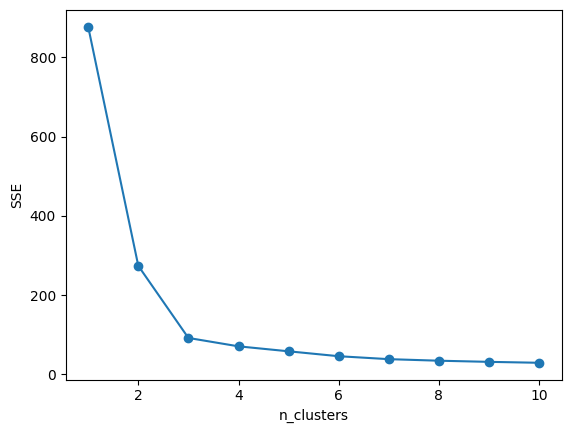

In [7]:
# 최적의 군집 개수 탐색
def elbow(X):
    sse = []
    for i in range(1,11):
        km = KMeans(n_clusters=i, init='k-means++', random_state=0)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('n_clusters')
    plt.ylabel('SSE')
    plt.show()
    
elbow(irisdf)

군집의 개수가 3개일때가 최적이다.

In [10]:
# 성능평가 : 실루엣분석
from sklearn.metrics import silhouette_samples, silhouette_score

iris = load_iris()
feature_names  = ['sepa_length', 'sepal_width', 'petal_length', 'petal_width']
irisdf = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(irisdf)
irisdf['cluster'] = kmeans.labels_

score_samples = silhouette_samples(iris.data, irisdf['cluster'])
print('silhouette_samples() return shape : ', score_samples.shape)

irisdf['silhouette_coeff'] = score_samples
average_score = silhouette_score(iris.data, irisdf['cluster'])
print('붓꽃 데이터 세트 Sihouette Analysis Score : {0:.3f}'.format(average_score))
irisdf.head()

silhouette_samples() return shape :  (150,)
붓꽃 데이터 세트 Sihouette Analysis Score : 0.553


,sepa_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302


In [11]:
# 군집별 평균 silhouette 
irisdf.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

##### 평균이동

In [15]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y  = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2 3 4 5]


In [16]:
# bandwidth를 작게 할 수록 군집 개수가 많아짐
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


In [17]:
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print('bandwidth 값 : ', round(bandwidth, 3))

bandwidth 값 :  1.816


In [18]:
clusterdf = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterdf['target'] = y

# estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print('cluster labels 유형 : ', np.unique(cluster_labels))

cluster labels 유형 :  [0 1 2]


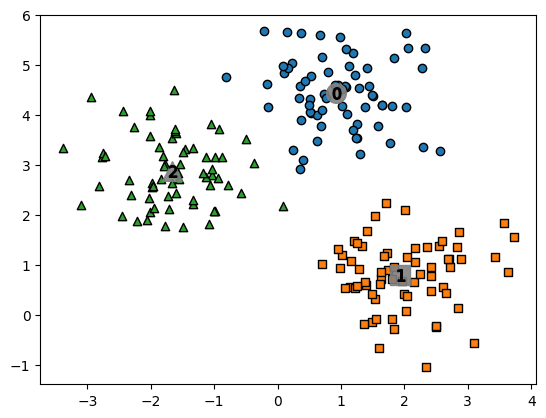

In [22]:
# 3개의 군집으로 구성됨 -> 시각화
clusterdf['meanshift_label']= cluster_labels
centers = meanshift.cluster_centers_

unique_labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterdf[clusterdf['meanshift_label'] == label]
    center_x_y = centers[label]
    
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x = center_x_y[0], y = center_x_y[1], s = 70, color='k', edgecolors='k',marker='$%d$' %label)
    
plt.show()

In [23]:
# target값과 군집 값 비교
print(clusterdf.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


##### GMM

In [24]:
iris = load_iris()
irisdf = pd.DataFrame(iris.data, columns=feature_names)
irisdf['target'] = iris.target

In [25]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

irisdf['gmm_cluster'] = gmm_cluster_labels
irisdf['target'] = iris.target

# target 값에 따라 gmm_clustser 값이 어떻게 매핑됐는지 확인
iris_result = irisdf.groupby(['target'])['gmm_cluster'].value_counts()
iris_result

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64

In [26]:
# KMeans 결과 확인
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisdf['kmeans_cluster'] = kmeans_cluster_labels
iris_result = irisdf.groupby(['target'])['kmeans_cluster'].value_counts()
iris_result

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64

##### DBSCAN

In [28]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.6, min_samples=8, metric='euclidean')
dbscan_labels = dbscan.fit_predict(iris.data)

irisdf['dbscan_cluster'] = dbscan_labels
irisdf['target'] = iris.target

iris_result = irisdf.groupby(['target'])['dbscan_cluster'].value_counts()
iris_result

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: dbscan_cluster, dtype: int64

##### 병합군집 Hierarchical Clustering

In [30]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_mutual_info_score

k_set = range(2, 10)
names = []
models = []
results = []
silhouette_scores = []
mutual_scores = []

for k in k_set:
    names.append('HC_K=%d' %k)
    
    #call model
    model = AgglomerativeClustering(n_clusters=k, affinity='euclidean',
                                    linkage='ward')
    result = model.fit_predict(X)
    models.append(result)
    
    silhouette_scores.append(silhouette_score(X, result, metric='euclidean'))
    mutual_scores.append(adjusted_mutual_info_score(y, result))

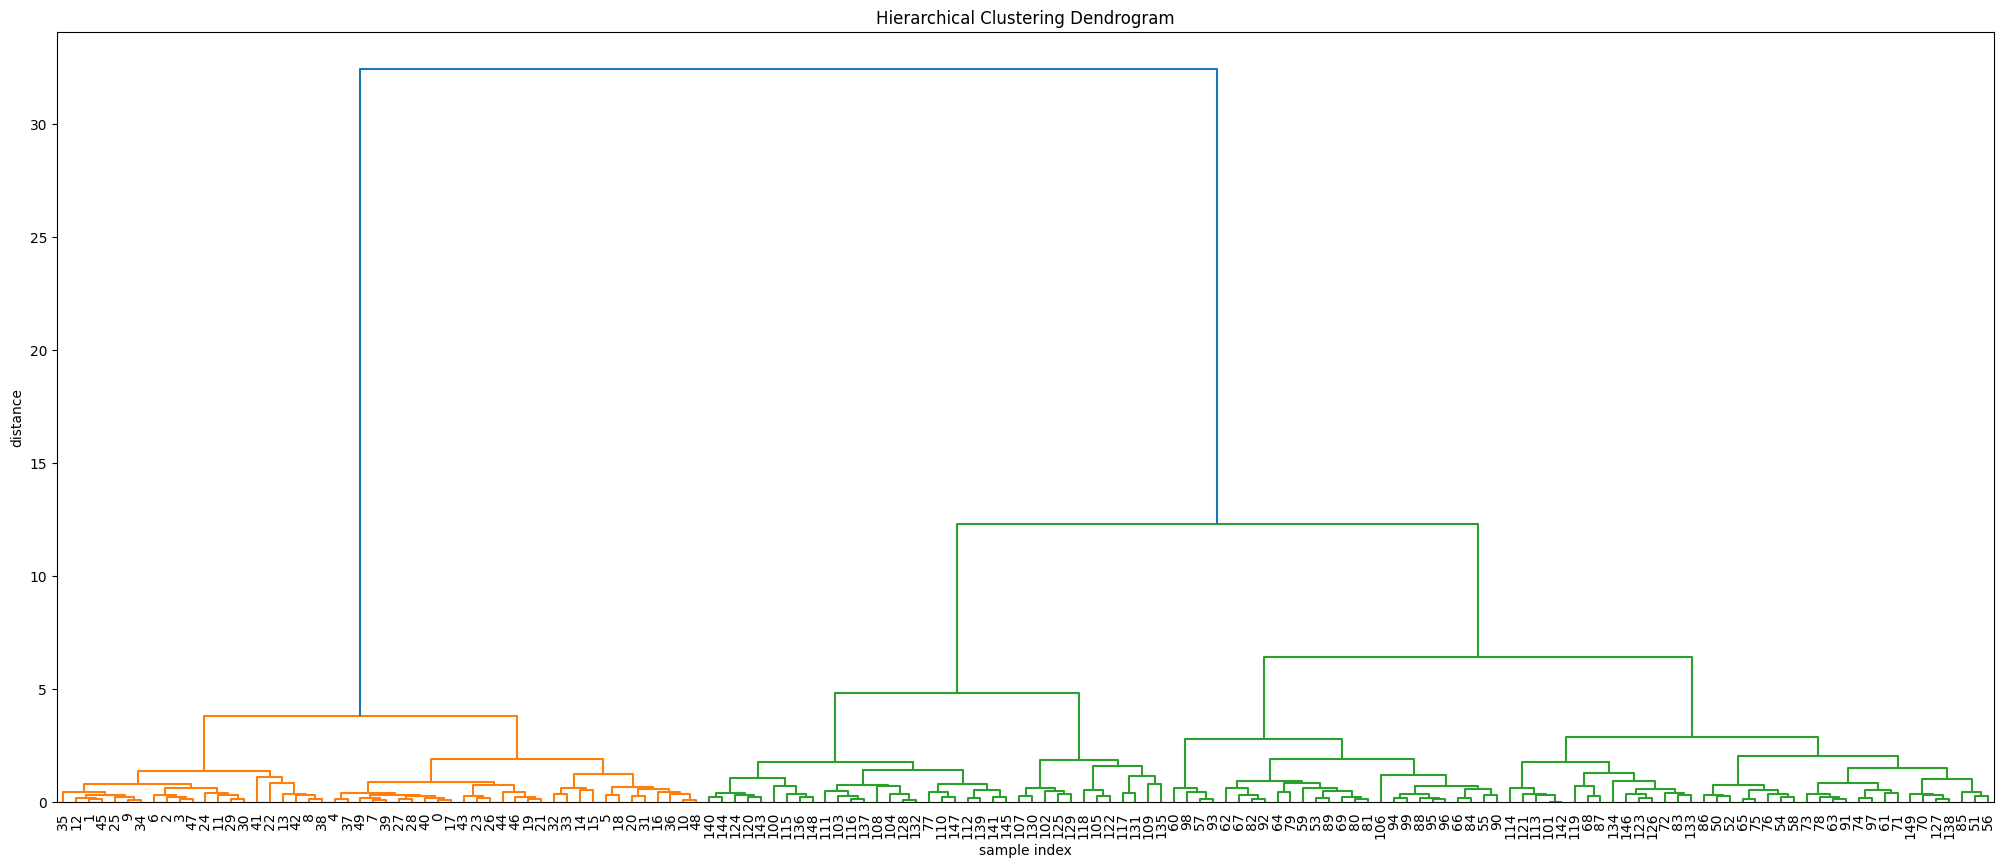

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, 'ward')

plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

dendrogram(Z, leaf_rotation=90.,
           leaf_font_size=10)
plt.show()

##### 인공 신경망 NN Neural Network

##### MLP : Feed-forward network 
MLP Regressor

In [32]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=200, random_state=1)

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [33]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
regr.predict(X_test[:2])

/Users/suhye/micromamba/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


array([-0.98506347, -7.19854141])

In [34]:
# R2 score
regr.score(X_test, y_test)

0.4162338898076593

In [35]:
regr.get_params

<bound method BaseEstimator.get_params of MLPRegressor(max_iter=500, random_state=1)>